In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/Users/adityameshram


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.162 🚀 Python-3.11.7 torch-2.7.1 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 218.0/228.3 GB disk)


In [4]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11m-seg.pt')
image = Image.open('/Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/5.jpg')
result = model.predict(image, conf=0.25)[0]


0: 384x640 (no detections), 266.3ms
Speed: 4.2ms preprocess, 266.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
import os
from roboflow import Roboflow

# Step 1: Set API key directly (since no userdata like Colab)
os.environ["ROBOFLOW_API_KEY"] = "XqsR9oIpjL2trgf1kP3y"

# Step 2: Create and change to datasets directory
datasets_dir = os.path.expanduser("~/datasets")
os.makedirs(datasets_dir, exist_ok=True)
os.chdir(datasets_dir)

# Step 3: Access and download dataset
rf = Roboflow(api_key=os.environ["ROBOFLOW_API_KEY"])
project = rf.workspace("aditya-choudhary-ehv9p").project("l-s-kvbur")
version = project.version(1)
dataset = version.download("yolov11")  # or "yolov8", "yolov5", etc., as needed

loading Roboflow workspace...
loading Roboflow project...


In [3]:
pip install ultralytics --upgrade

Note: you may need to restart the kernel to use updated packages.


In [7]:
dataset.location

'/Users/adityameshram/datasets/L-S-1'

In [1]:
from ultralytics import YOLO

model = YOLO("yolo11m-seg.pt")  # load pretrained model

model.train(
    data="/Users/adityameshram/datasets/L-S-1/data.yaml",
    epochs=20,
    imgsz=640,
    device='cpu',         # ← Force CPU
    workers=0,            # ← Avoid parallel loading crash
    batch=4               # ← Lower batch size
)

Ultralytics 8.3.162 🚀 Python-3.11.7 torch-2.7.1 CPU (Apple M1)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/adityameshram/datasets/L-S-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

train: Scanning /Users/adityameshram/datasets/L-S-1/train/labels.cache... 891 im

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 123.3±30.5 MB/s, size: 29.5 KB)



val: Scanning /Users/adityameshram/datasets/L-S-1/valid/labels.cache... 85 image


Plotting labels to /Users/adityameshram/runs/segment/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)


2025/07/08 09:25:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(fe1d4da9fd214fb8956b3b10a2323ea4) to /Users/adityameshram/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /Users/adityameshram/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/adityameshram/runs/segment/train8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G     0.7414      1.761      1.347      1.137          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.868      0.798      0.829       0.66      0.727      0.652      0.638      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.7584       1.45      1.007      1.103         19   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.673      0.676      0.651      0.411      0.627      0.642      0.584      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.7148      1.399     0.9434      1.091         12   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.926       0.92      0.965       0.83      0.927      0.919      0.956      0.776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.6845      1.362     0.8849      1.063          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.909      0.876      0.918      0.744      0.912      0.876      0.907      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.6418      1.166     0.8172      1.039          8   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.952      0.857      0.925      0.786      0.944      0.851      0.911      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.5754     0.9933     0.7429      1.002         14   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.963      0.933      0.973      0.871      0.957      0.927      0.965      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      0.558       1.04     0.7012     0.9929         14   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.943      0.924      0.967      0.866      0.947      0.924      0.965      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.5242     0.9271     0.6448     0.9826         11   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.941      0.874       0.89      0.806      0.927      0.862      0.875      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.4979     0.8705     0.6277     0.9746          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.984      0.965      0.979      0.913      0.984      0.965      0.979      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.4635     0.8004     0.5882     0.9524          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.928      0.922      0.944      0.878      0.933      0.928      0.947      0.868


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G       0.36     0.5404     0.4112     0.9177          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.923      0.919       0.96      0.853      0.916      0.913      0.959      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.3591     0.4964     0.3792     0.9083          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.967      0.958      0.981      0.885      0.967      0.958      0.981      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.3293     0.4665     0.3374     0.8999          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.968      0.918      0.978       0.89      0.961      0.912      0.975      0.903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.3003     0.4351     0.3372     0.8833          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.987      0.911      0.976      0.905      0.987      0.911      0.976      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.2754     0.4195     0.2938     0.8717          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.973      0.958      0.985      0.925      0.973      0.958      0.985      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.2648     0.4065     0.2796     0.8749          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.968      0.974      0.985      0.928      0.968      0.974      0.985      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.2526     0.3903     0.2701     0.8608          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.984      0.957      0.984       0.92      0.984      0.957      0.984      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.2355     0.3672     0.2505     0.8547          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.969      0.976      0.988      0.937      0.969      0.976      0.988      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.2273     0.3556     0.2317     0.8593          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.976      0.938      0.984      0.929      0.976      0.938      0.984       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.2103      0.345      0.216     0.8485          6   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         85        170      0.975      0.975      0.992      0.935      0.975      0.975      0.992       0.95



20 epochs completed in 10.493 hours.
Optimizer stripped from /Users/adityameshram/runs/segment/train8/weights/last.pt, 45.2MB
Optimizer stripped from /Users/adityameshram/runs/segment/train8/weights/best.pt, 45.2MB

Validating /Users/adityameshram/runs/segment/train8/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.7 torch-2.7.1 CPU (Apple M1)
YOLO11m-seg summary (fused): 138 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         85        170      0.975      0.975      0.992      0.934      0.975      0.975      0.992       0.95
                 lane1         85         85      0.977      0.985      0.992      0.934      0.977      0.985      0.992      0.978
                 lane2         85         85      0.973      0.965      0.991      0.935      0.973      0.965      0.991      0.922
Speed: 1.4ms preprocess, 548.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /Users/adityameshram/runs/segment/train8
MLflow: results logged to /Users/adityameshram/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x30f8f7590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [15]:
from ultralytics import YOLO

# Load model
model = YOLO("yolo11m-seg.pt")

# Run prediction
results = model.predict(source='/Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/60.jpg', save=True, conf=0.5)


image 1/1 /Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/60.jpg: 384x640 (no detections), 249.0ms
Speed: 6.1ms preprocess, 249.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /Users/adityameshram/runs/segment/predict4


In [16]:
import os
from glob import glob

# Predict using pre-trained model
model1 = YOLO("yolo11m-seg.pt")
results1 = model1.predict(source='/Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/71.jpg', save=True)


image 1/1 /Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/71.jpg: 384x640 5 cars, 243.7ms
Speed: 1.2ms preprocess, 243.7ms inference, 18.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /Users/adityameshram/runs/segment/predict5


In [17]:
# List all training directories (like train1, train2...) — replacing !ls -d
train_dirs = glob("/Users/adityameshram/runs/segment/train*/")
print("Train directories:", train_dirs)


Train directories: ['/Users/adityameshram/runs/segment/train2/', '/Users/adityameshram/runs/segment/train5/', '/Users/adityameshram/runs/segment/train4/', '/Users/adityameshram/runs/segment/train3/', '/Users/adityameshram/runs/segment/train/', '/Users/adityameshram/runs/segment/train8/', '/Users/adityameshram/runs/segment/train6/', '/Users/adityameshram/runs/segment/train7/']


In [26]:
from ultralytics import YOLO

model = YOLO("/Users/adityameshram/runs/segment/train8/weights/best.pt")
results = model.predict(
    source="/Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/601.jpg",
    save=True,
    conf=0.5
)


image 1/1 /Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/601.jpg: 384x640 (no detections), 252.0ms
Speed: 1.9ms preprocess, 252.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /Users/adityameshram/runs/segment/predict6


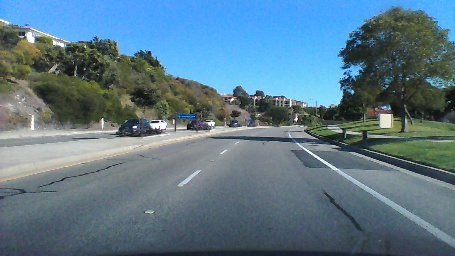

In [30]:
from IPython.display import Image
Image(filename='/Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/601.jpg')

In [31]:
# For detection task (if you trained detection instead of segmentation)
model3 = YOLO("yolo11m.pt")
results3 = model3.predict(source='/Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/601.jpg', save=True)


image 1/1 /Users/adityameshram/cpp/Self Driving Car/data/driving_dataset/data/601.jpg: 384x640 6 cars, 163.6ms
Speed: 1.4ms preprocess, 163.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /Users/adityameshram/runs/detect/predict2


In [33]:
import os

weights_dir = "/Users/adityameshram/runs/segment/train8/weights/"
print("Weights available:", os.listdir(weights_dir))

Weights available: ['last.pt', 'best.pt']


In [25]:
import os
from glob import glob

glob("/Users/adityameshram/runs/segment/train*/weights/best.pt")

['/Users/adityameshram/runs/segment/train8/weights/best.pt']